In [19]:
# Data Import and Examination

# Training data

import pandas as pd
import numpy as np

folderpath='./human-protein-atlas-image-classification/'
train_data=pd.read_csv(folderpath+'samples/random_trainset.csv')
train_data.head()

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,cd564e5a-bbbf-11e8-b2bb-ac1f6b6435d0,18 0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,e44a8b3a-bba6-11e8-b2ba-ac1f6b6435d0,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,6df4016a-bbaf-11e8-b2ba-ac1f6b6435d0,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,a1846ac8-bbab-11e8-b2ba-ac1f6b6435d0,2 0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5e3212f6-bbc0-11e8-b2bb-ac1f6b6435d0,7 0 21,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [20]:
print(train_data.shape)

(2156, 30)


In [21]:
# Validation data
val_data=pd.read_csv(folderpath+'samples/random_testset.csv')
val_data.head()

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,20d82004-bba1-11e8-b2b9-ac1f6b6435d0,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0c3c58a6-bbc2-11e8-b2bb-ac1f6b6435d0,25 6,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,76fe71dc-bbbe-11e8-b2ba-ac1f6b6435d0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,bcfbade4-bbb9-11e8-b2ba-ac1f6b6435d0,5 0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,b5366d20-bbc7-11e8-b2bc-ac1f6b6435d0,7,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
print(val_data.shape)

(1081, 30)


In [23]:
np.random.seed(42)

In [24]:
import os
import pandas as pd
#from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader,Subset
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import lr_scheduler
from torch import optim
from torchvision.utils import make_grid

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score


In [25]:
class ImgDataset(Dataset):

    def __init__(self,frames, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.frames = frames
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.frames)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,self.frames.iloc[idx, 0]+'.png')
        #image = open_rgby(img_name)
        #image = load_image(self.frames.iloc[idx, 0],self.root_dir)
        img = Image.open(img_name)
        label=  torch.tensor(self.frames.iloc[idx, 2:].tolist(), dtype=torch.float32)

        if self.transform:
            #temp_img = Image.open(sample['image'])
            img = self.transform(img)
            img /= 255 
            
        sample = {'image': img, 'label': label}
        return sample

In [26]:
# Transform images          
transformer = transforms.Compose([
                                  transforms.Resize(128),
                                  #transforms.CenterCrop(128),
                                  #transforms.RandomHorizontalFlip(),
                                  #transforms.ColorJitter(brightness=0.1,contrast=0.1, hue=0.1, saturation=0.1),
                                  #transforms.RandomRotation(20),
                                  transforms.ToTensor()])
                                # transforms.Normalize(means,stds])

10
torch.Size([4, 128, 128])
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0.]


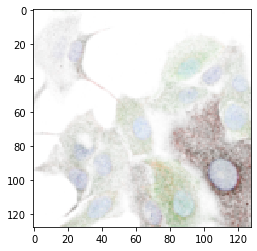

In [27]:
# Testing image import
train_df=train_data.iloc[0:10]
train_df.head()
train_dataset = ImgDataset(frames=train_df,
                           root_dir=folderpath+'updated_train/', transform=transformer)

print(len(train_dataset))

# Check image and labels
## check the images
print(torchvision.utils.make_grid(train_dataset[1]['image']).shape)
plt.imshow(torchvision.utils.make_grid(train_dataset[1]['image']*255).permute(1, 2, 0))
## check the labels related to the given image
print(train_dataset[1]['label'].numpy())


In [28]:
# Create Dataset and load data
#train_data=train_data.iloc[0:64]
#val_data=val_data.iloc[0:16] 

train_dataset = ImgDataset(frames=train_data,
                           root_dir=folderpath+'updated_train/', transform=transformer)
val_dataset = ImgDataset(frames=val_data,
                           root_dir=folderpath+'updated_train/', transform=transformer)
print(len(train_dataset))
print(len(val_dataset))

batch_size = 32
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True, num_workers=0)
validation_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                         batch_size=batch_size,
                                         shuffle=False,num_workers=0)
print(len(train_loader.dataset))
print(len(validation_loader.dataset))

2156
1081
2156
1081


In [29]:
# Testing    
dataiter=next(iter(train_loader))
x, target = dataiter['image'], dataiter['label'].float()
print(x.size(1), target.size(1))
            
#print(len(train_loader.dataset))

4 28


In [32]:
# load pre-trained model
import torchvision.models as models
base_model = models.resnet50(pretrained=True)
n_image_channels=4
class MultiClassifier(nn.Module):
    def __init__(self, base_model, output):
        super(MultiClassifier, self).__init__()
        self.conv1=nn.Conv2d(in_channels=4, out_channels=3, kernel_size=1, stride=1, padding=0)
        self.base_model = base_model
        self.output = output
        self.fc1 = nn.Linear(n_outs, 512)
        self.fc2 = nn.Linear(512, 28)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, image):
        x=self.conv1(image)
        x = self.base_model(x)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return torch.sigmoid(x)

In [33]:
# Create CNN Model
class MultiClassifier(nn.Module):

    def __init__(self,nclasses=28):
        #self.nclasses=3 # This needs to be changed when using different number of classes for developing model
        super(MultiClassifier, self).__init__()
        self.ConvLayer1 = nn.Sequential(nn.Conv2d(in_channels=4, out_channels=16, kernel_size=5, stride=1, padding=0), 
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size=2)
                                       )
        self.ConvLayer2 = nn.Sequential(nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0), 
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size=2),
                                        nn.Dropout(0.25)                                          
                                       )
        self.Linear1 = nn.Linear(32 * 29 * 29, 1024)
        self.Linear2 = nn.Linear(1024, 256)
        self.Linear3 = nn.Linear(256, nclasses) 
        
    def forward(self, x):
        x = self.ConvLayer1(x)
        x = self.ConvLayer2(x)
        x = x.view(x.size(0), -1)
        x = self.Linear1(x)
        x = self.Linear2(x)
        x = self.Linear3(x)
        return torch.sigmoid(x)

In [34]:
model=MultiClassifier()

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9, weight_decay = 1e-5)

prob_threshold=0.5

def fit_model(epochs, model, data_loader, phase = 'training'):
    
    print("Epoch: {}".format(epochs))
    if phase == 'training':
        model.train()
        
    if phase == 'validataion':
        model.eval()
        
    running_loss =0
    running_f1 =0
    running_acc=0
    running_macrof1 =0
    cnt=0
    for i, data in enumerate(data_loader):
        
        x, target = data['image'], data['label'].float()
        #print(len(x.shape), len(target))
        #x, target = Variable(x), Variable(target)
        
        if phase == 'training':
            optimizer.zero_grad()
        
        out = model(x)
        loss = criterion(out, target)            

        preds=out.data>prob_threshold
        preds=preds.to(torch.float32)

        if phase == 'training':            
            loss.backward()        
            optimizer.step()
            
        running_loss+=loss.item()*x.size(0)
        yactual=target.to(torch.int).numpy()
        ypred=preds.to(torch.int).numpy()
        
        running_f1+=f1_score(yactual, ypred, average='samples')*x.size(0)
        running_acc+=(ypred==yactual).sum()/yactual.shape[0]/yactual.shape[1]*x.size(0)
        running_macrof1+=f1_score(yactual, ypred, average='macro')
        cnt+= 1
        
    total_batch_loss = running_loss/len(data_loader.dataset)
    total_batch_f1 = running_f1/len(data_loader.dataset)
    total_batch_macrof1 = running_macrof1/cnt   
    total_batch_acc=running_acc/len(data_loader.dataset)
    
    print("{} loss is {} ".format(phase,total_batch_loss))
    print("{} f1-score is {} ".format(phase, total_batch_f1))
    print("{} macro f1-score is {} ".format(phase, total_batch_macrof1))    
    print("{} accuracy is {} ".format(phase, total_batch_acc))    
    return total_batch_loss, total_batch_f1, total_batch_acc, total_batch_macrof1

In [35]:
#Save Model
train_losses = []
train_f1_scores = []
train_accuracy=[]
train_macrof1_scores = []
valid_losses = [] 
valid_f1_scores = []
valid_accuracy=[]
valid_macrof1_scores = []

n_epochs=5
n_epochs2=0
for i in range(n_epochs):
    train_l, train_f1, train_acc, train_macrof1 = fit_model(i, model, train_loader)
    valid_l, valid_f1, valid_acc,valid_macrof1 = fit_model(i, model, validation_loader, phase = 'validation')
    train_losses.append(train_l) 
    train_f1_scores.append(train_f1)
    train_accuracy.append(train_acc) 
    train_macrof1_scores.append(train_macrof1)    
    valid_losses.append(valid_l); 
    valid_f1_scores.append(valid_f1)
    valid_accuracy.append(valid_acc)  
    valid_macrof1_scores.append(valid_macrof1)    
#torch.save(model,  './saved_models/run')
torch.save({
            'epoch': n_epochs-1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_losses':train_losses,
            'train_f1_scores':train_f1_scores,
            'train_accuracy':train_accuracy,   
            'train_macrof1_scores':train_macrof1_scores,    
            'valid_losses':valid_losses,
            'valid_f1_scores':valid_f1_scores,
            'valid_accuracy':valid_accuracy, 
            'valid_macrof1_scores':valid_macrof1_scores    
            }, './saved_models/run.pt')

Epoch: 0


c:\users\chun\.conda\envs\venv\lib\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


training loss is 0.4133823860664757 
training f1-score is 0.06023927409186058 
training macro f1-score is 0.012619852012153857 
training accuracy is 0.8669990723562155 
Epoch: 0
validation loss is 0.18373185845572676 
validation f1-score is 0.0 
validation macro f1-score is 0.0 
validation accuracy is 0.9412250561649267 
Epoch: 1
training loss is 0.18126279992053151 
training f1-score is 0.001004947433518862 
training macro f1-score is 0.0002553104575163399 
training accuracy is 0.9411608799363901 
Epoch: 1
validation loss is 0.18362049995529553 
validation f1-score is 0.0 
validation macro f1-score is 0.0 
validation accuracy is 0.9412250561649267 
Epoch: 2
training loss is 0.18125072298554187 
training f1-score is 0.011982065553494122 
training macro f1-score is 0.0009811710326193168 
training accuracy is 0.9407467532467532 
Epoch: 2
validation loss is 0.1836066213087502 
validation f1-score is 0.002466851680542707 
validation macro f1-score is 0.0006276986319003126 
validation accur

In [35]:
# Testing f1 score calculation
yactual2=[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
ypred2=[[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1],
 [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1]]
f1=f1_score(yactual2, ypred2, average='samples')*16
print(f1)

2.6853146853146854


In [54]:
# Continue model
checkpoint=torch.load('./saved_models/run.pt')
model = MultiClassifier()
#model==torch.load('./saved_models/run')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

train_losses = []
train_f1_scores = []
train_accuracy=[]
train_macrof1_scores = []
valid_losses = [] 
valid_f1_scores = []
valid_accuracy=[]
valid_macrof1_scores = []

train_losses = checkpoint['train_losses']
train_f1_scores = checkpoint['train_f1_scores']
train_accuracy=checkpoint['train_accuracy']
train_macrof1_scores = checkpoint['train_macrof1_scores']
valid_losses = checkpoint['valid_losses']
valid_f1_scores = checkpoint['valid_f1_scores']
valid_accuracy=checkpoint['valid_accuracy']
valid_macrof1_scores = checkpoint['valid_macrof1_scores']

n_epochs2=3
for i in range(n_epochs2):
    train_l, train_f1, train_acc, train_macrof1 = fit_model(i, model, train_loader)
    valid_l, valid_f1, valid_acc,valid_macrof1 = fit_model(i, model, validation_loader, phase = 'validation')
    train_losses.append(train_l) 
    train_f1_scores.append(train_f1)
    train_accuracy.append(train_acc) 
    train_macrof1_scores.append(train_macrof1)    
    valid_losses.append(valid_l); 
    valid_f1_scores.append(valid_f1)
    valid_accuracy.append(valid_acc)  
    valid_macrof1_scores.append(valid_macrof1)    
#torch.save(model,  './saved_models/run')
torch.save({
            'epoch': n_epochs-1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_losses':train_losses,
            'train_f1_scores':train_f1_scores,
            'train_accuracy':train_accuracy,   
            'train_macrof1_scores':train_macrof1_scores,    
            'valid_losses':valid_losses,
            'valid_f1_scores':valid_f1_scores,
            'valid_accuracy':valid_accuracy, 
            'valid_macrof1_scores':valid_macrof1_scores    
            }, './saved_models/run.pt')

Epoch: 0
training loss is 0.6681330502033234 
training f1-score is 0.0 
training macro f1-score is 0.0 
training accuracy is 0.8229166666666667 
Epoch: 0
validation loss is 0.6664933562278748 
validation f1-score is 0.0 
validation macro f1-score is 0.0 
validation accuracy is 0.8541666666666666 
Epoch: 1
training loss is 0.6681444048881531 
training f1-score is 0.0 
training macro f1-score is 0.0 
training accuracy is 0.8229166666666666 
Epoch: 1
validation loss is 0.6666853427886963 
validation f1-score is 0.0 
validation macro f1-score is 0.0 
validation accuracy is 0.8541666666666666 
Epoch: 2
training loss is 0.6681747436523438 
training f1-score is 0.0 
training macro f1-score is 0.0 
training accuracy is 0.8229166666666666 
Epoch: 2
validation loss is 0.6662065982818604 
validation f1-score is 0.0 
validation macro f1-score is 0.0 
validation accuracy is 0.8541666666666666 


In [135]:
#print(n_epochs, n_epochs2)
#print(len(train_losses), len(valid_losses))

2 3
5 5


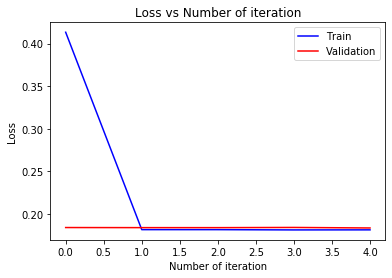

In [36]:
# visualization loss 
plt.plot(range(n_epochs+n_epochs2),train_losses, color = "blue",label='Train')
plt.plot(range(n_epochs+n_epochs2),valid_losses, color = "red", label='Validation')
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Loss vs Number of iteration")
plt.legend()
plt.show()

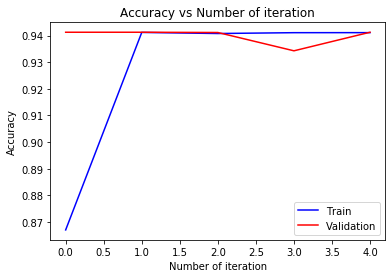

In [37]:
# visualization of accuracy
plt.plot(range(n_epochs+n_epochs2),train_accuracy, color = "blue",label='Train')
plt.plot(range(n_epochs+n_epochs2),valid_accuracy, color = "red", label='Validation')
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of iteration")
plt.legend()
plt.show()

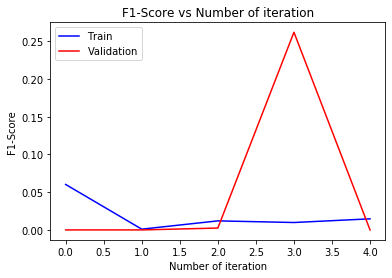

In [38]:
# visualization of f1-score
plt.plot(range(n_epochs+n_epochs2),train_f1_scores,color = "blue",label='Train')
plt.plot(range(n_epochs+n_epochs2),valid_f1_scores,color = "red", label='Validation')
plt.xlabel("Number of iteration")
plt.ylabel("F1-Score")
plt.title("F1-Score vs Number of iteration")
plt.legend()
plt.show()

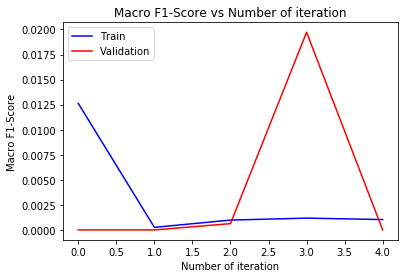

In [39]:
# visualization of macro f1-score
plt.plot(range(n_epochs+n_epochs2),train_macrof1_scores,color = "blue",label='Train')
plt.plot(range(n_epochs+n_epochs2),valid_macrof1_scores,color = "red", label='Validation')
plt.xlabel("Number of iteration")
plt.ylabel("Macro F1-Score")
plt.title("Macro F1-Score vs Number of iteration")
plt.legend()
plt.show()

In [141]:
#mean , std = torch.tensor([0.485, 0.456, 0.406]),torch.tensor([0.229, 0.224, 0.225])
def denormalize(image):
    image = image.clone().detach()
    image=image*255
    image=transforms.ToPILImage()(image)
    #image = transforms.Normalize(-mean/std,1/std)(image) #denormalize
    #image = image.permute(1,2,0) 
    #image = torch.clamp(image,0,1)
    image = transforms.Resize(512)(image)
    return image

def visualize(image, actual , pred):
    fig,ax = plt.subplots(figsize=(8,8))
    ax.imshow(denormalize(image))
    ax.grid(False)    
    classes=np.where(actual == 1)[0]
    for i , s in enumerate(classes):
        ax.text(0 , i*20  , s , verticalalignment='top', color="blue", fontsize=12, weight='bold')
 
    classes=np.where(pred == 1)[0]
    for i , s in enumerate(classes):
        ax.text(485 , i*20  , s , verticalalignment='top', color="red", fontsize=12, weight='bold')

    plt.show()

#visualize(image[0] , label[0].tolist() , output[0].tolist())


torch.Size([16, 4, 128, 128]) torch.Size([16, 28])


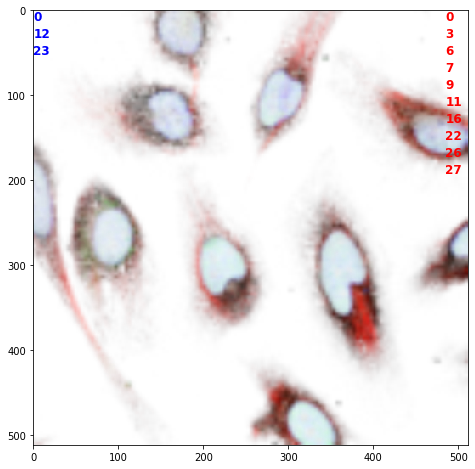

In [143]:
# Visualize results
dataiter=next(iter(validation_loader))
image = dataiter['image']
label = dataiter['label']
print(image.shape, label.shape)

checkpoint=torch.load('./saved_models/run.pt')
model = MultiClassifier()
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

#model = MultiClassifier()
#model_path='./saved_models/run'+str(run_index)
#model.load_state_dict(torch.load(model_path))
model=model.eval()
output = model(image)
output = output>prob_threshold
image_id=0
visualize(image[image_id], label[image_id], output[image_id])
#output=output.detach().numpy()
#preds = np.where(out == 1)[1]

In [173]:
# Prediction
submission_filename='submission_v2.csv'
submission=pd.read_csv(folderpath+submission_filename)
submission.drop(['Predicted'], axis=1, inplace=True)
submission.head()

,Id,Cls0,Cls1,Cls2,Cls3,Cls4,Cls5,Cls6,Cls7,Cls8,...,Cls18,Cls19,Cls20,Cls21,Cls22,Cls23,Cls24,Cls25,Cls26,Cls27
0,00008af0-bad0-11e8-b2b8-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0000a892-bacf-11e8-b2b8-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0008baca-bad7-11e8-b2b9-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
def predict(model, submission_df, batch_size=16):
    test_dataset=ImgDataset(submission_df,
                           root_dir=folderpath+'updated_test/',transform=transformer)
    test_loader=torch.torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False,num_workers=0)    

    for i, data in enumerate(test_loader):
        #dataiter = next(iter(test_loader))
        #image = dataiter['image']
        image=data['image']
        print(image.shape)
        out = model(image)
        out=out>prob_threshold        
        label=out.to(torch.int).detach().numpy()
        print(label.shape)
        submission_df.iloc[i:batch_size,1:]=label
    return submission_df

# Prediction
pred_start_index=0
pred_len=16
#out_trainfile=folderpath+'submission_v3.csv'
#submission=pd.read_csv(out_trainfile)
submission_data=submission.iloc[pred_start_index:pred_len]
submission_data.head()

checkpoint=torch.load('./saved_models/run.pt')
model = MultiClassifier()
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
model=model.eval()

#model_path='./saved_models/run'+str(run_index)
#model=torch.load(model_path)
#model=model.eval()
final_submission=predict(model, submission_data,batch_size)
final_submission.head(batch_size)

torch.Size([16, 4, 128, 128])
(16, 28)


,Id,Cls0,Cls1,Cls2,Cls3,Cls4,Cls5,Cls6,Cls7,Cls8,...,Cls18,Cls19,Cls20,Cls21,Cls22,Cls23,Cls24,Cls25,Cls26,Cls27
0,00008af0-bad0-11e8-b2b8-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
1,0000a892-bacf-11e8-b2b8-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
2,0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
3,0008baca-bad7-11e8-b2b9-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
4,000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
5,00109f6a-bac8-11e8-b2b7-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
6,001765de-bacd-11e8-b2b8-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
7,0018641a-bac9-11e8-b2b8-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
8,00200f22-bad7-11e8-b2b9-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
9,0026f154-bac6-11e8-b2b7-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
